# アルピコホールディングス 日足（出来高）

In [8]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import re
import yfinance as yf

pattern = re.compile(r'(.+)\.T')

symbol = '297A.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='max')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-25 00:00:00+09:00,201.0,205.0,190.0,191.0,12613900,0.0,0.0
2024-12-26 00:00:00+09:00,199.0,241.0,199.0,241.0,35525900,0.0,0.0
2024-12-27 00:00:00+09:00,264.0,321.0,261.0,321.0,31090300,0.0,0.0
2024-12-30 00:00:00+09:00,345.0,350.0,260.0,267.0,46639700,0.0,0.0
2025-01-06 00:00:00+09:00,275.0,313.0,275.0,288.0,23329500,0.0,0.0


## ローソク足チャート

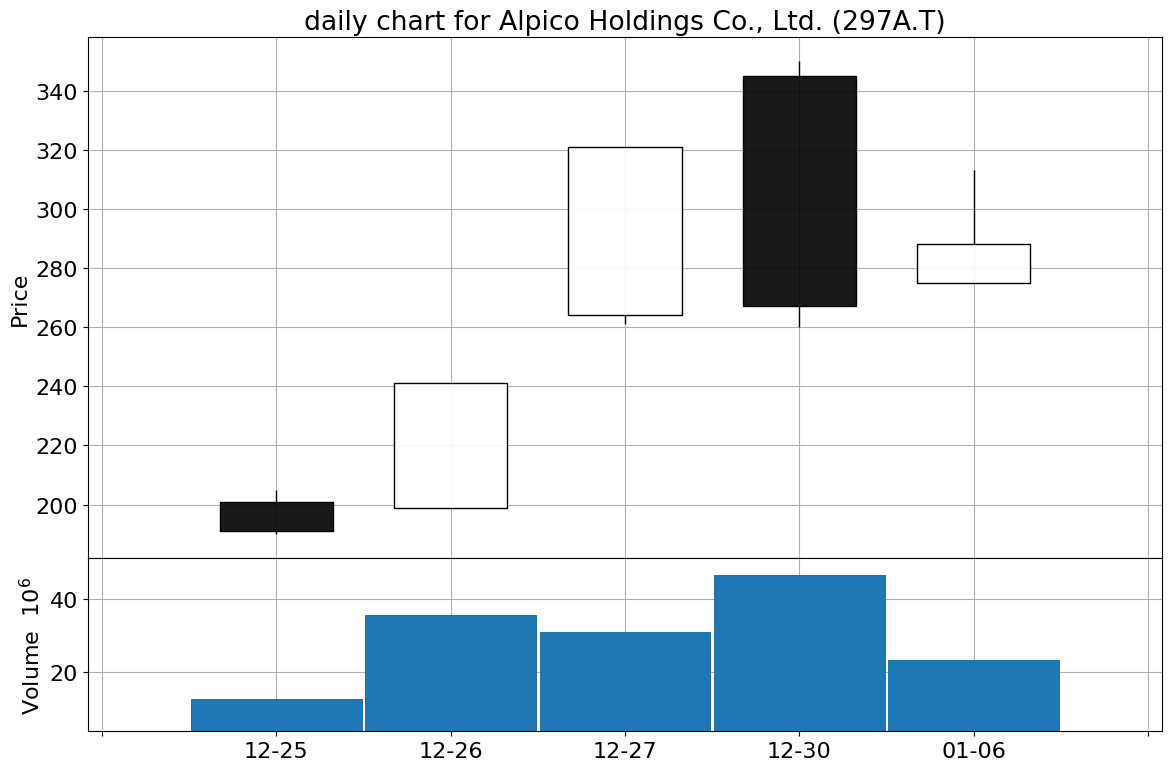

In [9]:
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 8))

gs = fig.add_gridspec(
    2, 1,
    wspace=0.0, hspace=0.0,
    height_ratios=[3, 1]
)

ax = dict()
for i, axis in enumerate(gs.subplots(sharex='col')):
    ax[i] = axis

mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%m-%d',
    xrotation=0,
    ax=ax[0],
    volume=ax[1],
)

try:
    ax[0].set_title('daily chart for %s (%s)' % (ticker.info['longName'], symbol))
except KeyError:
    ax[0].set_title('daily chart for %s' % symbol)

ax[0].grid()
ax[1].grid()

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [10]:
df.tail(2)['Close']

Date
2024-12-30 00:00:00+09:00    267.0
2025-01-06 00:00:00+09:00    288.0
Name: Close, dtype: float64

In [11]:
df.tail(2)['Close'].diff()

Date
2024-12-30 00:00:00+09:00     NaN
2025-01-06 00:00:00+09:00    21.0
Name: Close, dtype: float64